In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/MasterThesis/Splitted'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [2]:
!git clone https://github.com/joerivc/MasterThesis.git

Cloning into 'MasterThesis'...
remote: Enumerating objects: 6795, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 6795 (delta 19), reused 11 (delta 8), pack-reused 6762
Receiving objects: 100% (6795/6795), 1.21 GiB | 14.16 MiB/s, done.
Resolving deltas: 100% (211/211), done.
Updating files: 100% (40452/40452), done.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
DATADIRTRAIN = '/content/MasterThesis/Images6ClassesPerPerson/train'
DATADIRTEST = '/content/MasterThesis/Images6ClassesPerPerson/test'
DATADIRVAL = '/content/MasterThesis/Images6ClassesPerPerson/val'
CATEGORIES = ['Sitting','SittingPelvicRF','SittingPelvicRB','Standing','StandingPelvicRF','StandingPelvicRB']
IMG_SIZE=299

In [5]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIRTRAIN, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

In [6]:
test_data=[]
def create_test_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIRTEST, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                test_data.append([new_array,class_num])
            except Exception as e:
                pass

In [7]:
val_data=[]
def create_val_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIRVAL, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                val_data.append([new_array,class_num])
            except Exception as e:
                pass

In [8]:
create_training_data()
X_train=[]
y_train=[]
categories_train = []
label_train = []
for categories_train, label_train in training_data:
    X_train.append(categories_train)
    y_train.append(label_train)


In [9]:
X_train1 = np.array(X_train)/255.0
y_train = np.array(y_train)

In [10]:
create_test_data()
X_test=[]
y_test=[]
for categories_test, label_test in test_data:
    X_test.append(categories_test)
    y_test.append(label_test)

In [11]:
X_test1 = np.array(X_test)/255.0

In [12]:
create_val_data()
X_val=[]
y_val=[]
for categories_val, label_val in val_data:
    X_val.append(categories_val)
    y_val.append(label_val)

In [13]:
X_val1 = np.array(X_val)/255.0
y_val = np.array(y_val)

In [14]:
print(X_train1.shape)

(1440, 299, 299, 3)


In [15]:
print(len(y_train))

1440


In [16]:
X_test = np.array(X_test)/255.0
y_test = np.array(y_test)

In [17]:
# Load pretrained Xception model
xception = tf.keras.applications.Xception(weights='imagenet', include_top=True)
xception.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#train_datagen = ImageDataGenerator()
#train_datagen.fit(X_train)
#xception.fit(train_datagen.flow(X_train, y_train, batch_size=32),
#                    steps_per_epoch=len(x_train) / batch_size, epochs=10, verbose=1)
print(X_train1.shape)
xception.fit(X_train1, y_train,epochs=20,batch_size=16,validation_data=(X_val1, y_val))

91884032/91884032 [==============================] - 5s 0us/step
(1440, 299, 299, 3)
Epoch 1/20
90/90 [==============================] - 51s 226ms/step - loss: 0.6289 - accuracy: 0.8319 - val_loss: 1.9773 - val_accuracy: 0.7500
Epoch 2/20
90/90 [==============================] - 18s 197ms/step - loss: 0.1607 - accuracy: 0.9500 - val_loss: 1.5527 - val_accuracy: 0.6687
Epoch 3/20
90/90 [==============================] - 18s 199ms/step - loss: 0.0868 - accuracy: 0.9688 - val_loss: 4.5938 - val_accuracy: 0.5333
Epoch 4/20
90/90 [==============================] - 18s 200ms/step - loss: 0.0909 - accuracy: 0.9750 - val_loss: 10.2285 - val_accuracy: 0.1333
Epoch 5/20
90/90 [==============================] - 18s 202ms/step - loss: 0.0244 - accuracy: 0.9937 - val_loss: 1.6019 - val_accuracy: 0.7896
Epoch 6/20
90/90 [==============================] - 18s 200ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.4803 - val_accuracy: 0.7021
Epoch 7/20
90/90 [==============================] - 18s 

In [18]:
loss, accuracy = xception.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

15/15 [==============================] - 4s 128ms/step - loss: 3.8602 - accuracy: 0.3917
Test Loss: 3.8602209091186523, Test Accuracy: 0.3916666805744171


15/15 [==============================] - 3s 124ms/step


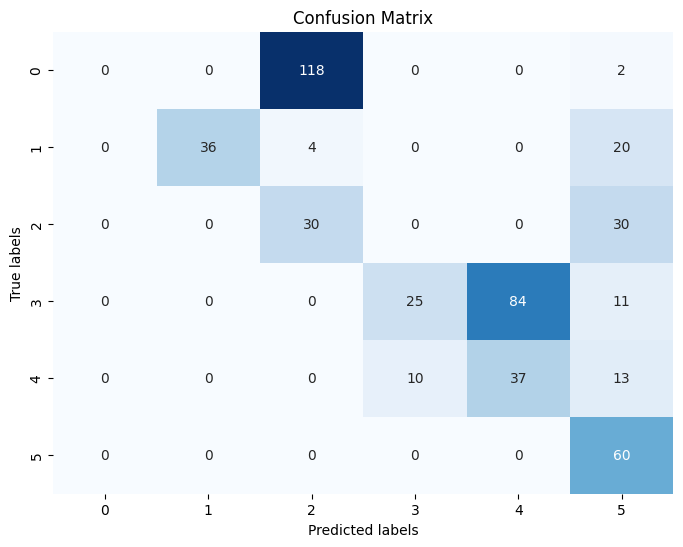

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have trained your Xception model (xception) and have test data (X_test, y_test)

# Make predictions on test data
y_pred = xception.predict(X_test)
# Convert probabilities to class labels
y_pred_classes = y_pred.argmax(axis=-1)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Visualize confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)  # Normalize by row
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")

# Save the confusion matrix plot as an image file
plt.savefig('confusion_matrix.png')

plt.show()